In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dataset = pd.read_csv("C:/Users/user/Downloads/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

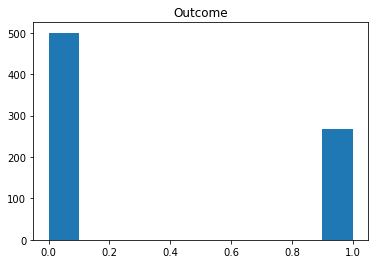

In [3]:
dataset.describe()
plt.hist(dataset['Outcome'])
plt.title('Outcome')
plt.show()

In [4]:
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [5]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [6]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
#softmax, tanh
model.add(Dense(64,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))
 
model.compile(Adam(lr=0.004), loss = 'binary_crossentropy',metrics=['accuracy'])
#categorical_crossentropy

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,218
Trainable params: 3,218
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 2.6964 - accuracy: 0.6270 - val_loss: 0.8879 - val_accuracy: 0.7143
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0202 - accuracy: 0.6140 - val_loss: 0.5831 - val_accuracy: 0.7013
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8047 - accuracy: 0.6466 - val_loss: 0.6220 - val_accuracy: 0.6818
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6857 - val_loss: 0.6387 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6612 - val_loss: 0.7060 - val_accuracy: 0.6623
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6792 - val_loss: 0.6061 - val_accuracy: 0.6883
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6808 - val_loss: 0.5849 - val_accuracy: 0.7078
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7427 - val_loss: 0.5149 - val_accuracy: 0.7597
Epoch 60/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7443 - val_loss: 0.5726 - val_accuracy: 0.7273
Epoch 61/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7313 - val_loss: 0.5488 - val_accuracy: 0.7338
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7671 - val_loss: 0.5555 - val_accuracy: 0.7727
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7557 - val_loss: 0.5535 - val_accuracy: 0.7403
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7541 - val_loss: 0.5601 - val_accuracy: 0.7532
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7769 - val_loss: 0.5956 - val_accuracy: 0.7273
Epoch 

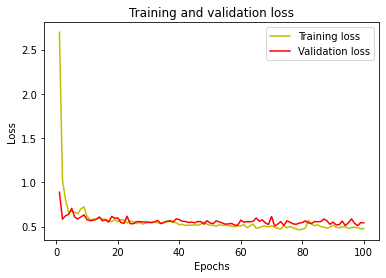

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

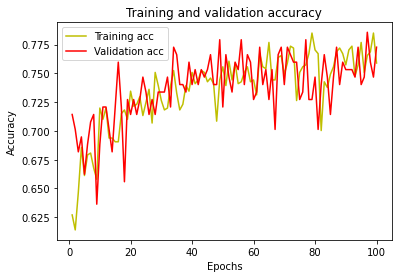

In [10]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       107
           1       0.62      0.64      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154

[[89 18]
 [17 30]]
